## Computing Alpha, Beta, and R Squared in Python 

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

*Running a Regression in Python - continued:*

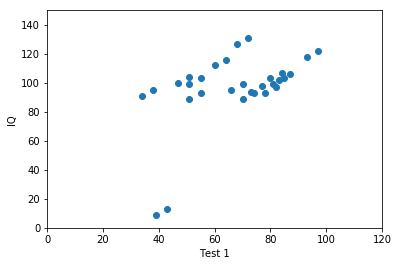

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

data = pd.read_excel('IQ_data.xlsx')

X = data['Test 1']
Y = data['IQ']

plt.scatter(X,Y)
plt.axis([0, 120, 0, 150])
plt.ylabel('IQ')
plt.xlabel('Test 1')
plt.show()

****

Use the statsmodels’ **.add_constant()** method to reassign the X data on X1. Use OLS with arguments Y and X1 and apply the fit method to obtain univariate regression results. Help yourself with the **.summary()** method. 

In [3]:
X1=sm.add_constant(X)
Y=data['IQ']

In [6]:
model=sm.OLS(Y, X1)
reg=model.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9.768
Date:                Tue, 16 Jun 2020   Prob (F-statistic):            0.00411
Time:                        19:41:18   Log-Likelihood:                -134.94
No. Observations:                  30   AIC:                             273.9
Df Residuals:                      28   BIC:                             276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8828     16.760      2.738      0.011      11.552      80.213
Test 1         0.7587      0.243      3.125      0.004       0.261       1.256
==============================================================================
Omnibus:                       18.268   Durbin-Watson:                   2.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.621
Skew:                          -1.535   Prob(JB):                     7.43e-06
Kurtosis:                       6.077   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By looking at the p-values, would you conclude Test 1 scores are a good predictor?

*****

Imagine a kid would score 84 on Test 1. How many points is she expected to get on the IQ test, approximately?

In [10]:
(84*0.7587)+45.8828

109.6136

******

### Alpha, Beta, R^2:

Apply the stats module’s **linregress()** to extract the value for the slope, the intercept, the r squared, the p_value, and the standard deviation.

In [11]:
( slope,intercept, r,p_value, stdev)=stats.linregress(X, Y)

In [12]:
slope

0.758723457096734

In [13]:
( slope,intercept, r,p_value, stdev)

(0.758723457096734,
 45.88277660499194,
 0.5085667021566542,
 0.004109055664218723,
 0.24275664244042755)

In [14]:
intercept

45.88277660499194

In [15]:
r**2

0.25864009054249504

In [16]:
p_value

0.004109055664218723

In [17]:
stdev

0.24275664244042755

Use the values of the slope and the intercept to predict the IQ score of a child, who obtained 84 points on Test 1. Is the forecasted value different than the one you obtained above?

In [18]:
(84*0.7587)+45.8828

109.6136

No

Follow the steps to draw the best fitting line of the provided regression.

Define a function that will use the slope and the intercept value to calculate the dots of the best fitting line.

In [19]:
def fitline(b):
    return intercept + slope * b

Apply it to the data you have stored in the variable X.

In [20]:
line = fitline(X)

Draw a scatter plot with the X and Y data and then plot X and the obtained fit-line.

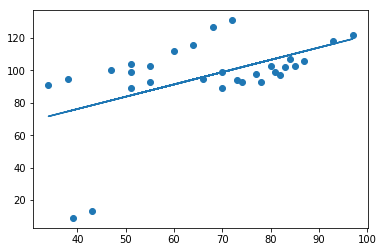

In [21]:
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [22]:
#Let's try to dump the outliers in order to improve R2

In [25]:
new_data=data[data['Test 1'] > 60]

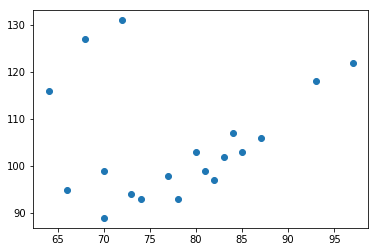

In [31]:
X1=sm.add_constant(new_data['Test 1'])
Y=new_data['IQ']

X=new_data['Test 1']
plt.scatter(X,Y)

plt.show()

In [27]:
model22=sm.OLS(Y,X1 )

In [28]:
reg=model22.fit()

In [29]:
reg.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     IQ   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.4909
Date:                Tue, 16 Jun 2020   Prob (F-statistic):              0.493
Time:                        20:10:18   Log-Likelihood:                -73.814
No. Observations:                  19   AIC:                             151.6
Df Residuals:                      17   BIC:                             153.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.9637     25.677      3.387      0.004      32.789     141.139
Test 1         0.2289      0.327      0.701      0.493      -0.460       0.918
==============================================================================
Omnibus:                        5.098   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                3.638
Skew:                           1.072   Prob(JB):                        0.162
Kurtosis:                       3.032   Cond. No.                         707.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""